<a href="https://colab.research.google.com/github/rinkusahu1/ML/blob/Learning/TfData_Practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [ ]:
import traceback
import contextlib

# Some helper code to demonstrate the kinds of errors you might encounter.
@contextlib.contextmanager
def assert_raises(error_class):
  try:
    yield
  except error_class as e:
    print('Caught expected exception \n  {}:'.format(error_class))
    traceback.print_exc(limit=2)
  except Exception as e:
    raise e
  else:
    raise Exception('Expected {} to be raised but no error was raised!'.format(
        error_class))

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [ ]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


In [ ]:
it = iter(dataset)

print(next(it).numpy())
print(next(it).numpy())

8
3


In [ ]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

22


In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [ ]:
for element in dataset2:
    print(element)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9985056>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([87,  3, 70, 24, 15,  5, 93, 65,  0, 51, 33, 23, 79, 51, 82, 44, 43,
       48, 43, 31, 52, 84, 75, 98,  2, 45, 59, 45, 81, 60, 57, 18,  1, 14,
       25, 81, 97, 51, 76, 99, 47, 12, 81,  8, 29, 83,  9, 18, 53, 67,  6,
       81, 67, 22,  6,  0, 16, 51, 37,  7, 72, 60, 84,  6, 30, 65, 25, 98,
       70, 74, 84, 72, 12, 85, 35, 57, 80, 59, 89, 23, 44, 22, 48, 81, 12,
       99, 39, 87, 47, 82, 23, 83, 48, 13, 35, 58, 12, 82, 56, 77],
      dtype=int32)>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.05986333>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([65,  2, 80, 57, 96, 99, 77, 68, 14, 67, 19, 24, 19, 33, 12, 27, 68,
        7, 11, 84, 56, 75, 30, 35, 67, 87, 16, 11, 58, 47, 65, 81, 92, 32,
       70, 54, 73, 13, 81, 37, 45,  9, 67, 94, 14, 12, 62, 47, 19, 76, 85,
       92, 35, 16, 63, 89, 56, 93, 57, 65, 37, 44, 86, 91, 22, 66, 46, 63,
       21,  0, 88, 35,  4, 35, 

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [ ]:
for element in dataset3:
    print(element[1])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8444419>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 0, 25, 51, 25, 18, 94, 52,  9, 61, 45, 84, 88, 32, 18, 16, 47, 51,
       62, 27, 78, 95, 11, 50, 53, 43, 20, 29, 30, 96, 95, 71, 13, 76, 98,
       69, 98, 44, 35, 78, 78, 98, 14, 62, 19, 24, 93, 94, 48, 30, 22, 24,
       12, 81, 83, 61, 26, 88, 59, 52,  3,  3, 46, 55, 99, 82, 25, 38, 13,
       64, 15, 71, 60, 19, 26, 24, 35, 68, 87, 58, 13, 91,  2,  0, 44, 20,
       39, 87, 19, 18, 58, 72,  2, 92, 52, 66,  5, 92, 94, 63, 18],
      dtype=int32)>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.84111047>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([38, 16, 36,  7, 31, 25, 27,  4, 10,  1,  3, 23, 43,  9, 91, 53, 56,
       91, 81, 70, 69, 30, 22, 69, 35, 12, 52, 53, 87, 79, 44, 81, 12, 16,
        0,  2, 52, 23, 11, 61, 69, 91,  1, 95, 11, 29, 77, 97, 88, 21, 24,
       15, 53, 13, 64, 43, 89, 27, 91, 38, 58, 94, 75, 32, 27, 49, 95, 38,
       13,  1, 53, 47,  8, 46, 

In [ ]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

dataset4.element_spec
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [ ]:
# prompt: know shape of dataset object

dataset.element_spec


(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

In [ ]:
# prompt: know number of elements in dataset

dataset.reduce(0, lambda state, value: state + 1).numpy()


60000

In [ ]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

for n in count(5):
  print(n)

0
1
2
3
4


In [ ]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes = (), )

In [ ]:
for count_batch in ds_counter.repeat().batch(10).take(10):
  print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [ ]:
def gen_series():
  i = 0
  while True:
    size = np.random.randint(0, 10)
    yield i, np.random.normal(size=(size,))
    i += 1

for i, series in gen_series():
  print(i, ":", str(series))
  if i > 5:
    break

0 : [-0.6955 -0.4403]
1 : [-0.3289  1.0655 -1.364   0.1246]
2 : [ 0.722   1.4629  0.2767  2.172   1.2671 -0.5934]
3 : [0.0731 1.8222 0.6352 1.6741 1.0125 0.3401]
4 : [ 1.1768  0.5217  0.9725 -0.8995]
5 : [ 0.1109  0.499   0.6435 -0.3786  0.8263 -0.9067 -0.7484]
6 : [ 0.202   0.1069  0.3424  0.6506  0.4596  0.4596  0.1006 -0.6863]


In [ ]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types=(tf.int32, tf.float32),
    output_shapes=((), (None,)))

ds_series

<_FlatMapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 2  5 19  3 10 16 24 23  8 18]

[[ 2.0645 -1.6723 -0.8858 -1.1564 -0.4316  0.0354  0.    ]
 [ 1.301   0.4265 -1.7643 -0.5356 -0.6444 -1.0444  0.9715]
 [ 0.      0.      0.      0.      0.      0.      0.    ]
 [-1.1207  0.6624  1.8296  1.7671  0.6658  0.      0.    ]
 [-0.1646 -0.6742  0.      0.      0.      0.      0.    ]
 [-0.733   0.474   0.      0.      0.      0.      0.    ]
 [ 1.1049  1.1028  0.      0.      0.      0.      0.    ]
 [ 0.785  -1.2525  1.0727 -1.5043 -0.4096  0.1603  0.6297]
 [ 0.6686 -0.6383  0.4789 -0.8438  1.1893 -0.8663 -1.6591]
 [ 0.6462  0.      0.      0.      0.      0.      0.    ]]


In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [ ]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [ ]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [ ]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [ ]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [ ]:
ds.reduce(0, lambda state, value: state + 1).numpy()

Found 3670 images belonging to 5 classes.


In [ ]:
# Creates a dataset that reads all of the examples from two files.
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

7904079/7904079 [==============================] - 1s 0us/step


In [ ]:
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

In [ ]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)  for file_name in file_names
]

In [ ]:
file_paths

['/root/.keras/datasets/cowper.txt',
 '/root/.keras/datasets/derby.txt',
 '/root/.keras/datasets/butler.txt']

In [ ]:
dataset = tf.data.TextLineDataset(file_paths)

In [ ]:
for line in dataset.take(5):
  print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [ ]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(lines_ds.take(10)):
  if i % 3 == 0:
    print()
  print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'

b'Illustrious into Ades premature,'


In [ ]:

titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file)
df.head()

30874/30874 [==============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


from matplotlib import pyplot as plt
_df_0['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['n_siblings_spouses'].plot(kind='hist', bins=20, title='n_siblings_spouses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fare'].plot(kind='hist', bins=20, title='fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('deck').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('embark_town').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='survived', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='n_siblings_spouses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='n_siblings_spouses', y='fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('class')):
  _plot_series(series, series_name, i)
  fig.legend(title='class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('deck')):
  _plot_series(series, series_name, i)
  fig.legend(title='deck', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('embark_town')):
  _plot_series(series, series_name, i)
  fig.legend(title='embark_town', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
_df_15['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['n_siblings_spouses'].plot(kind='line', figsize=(8, 4), title='n_siblings_spouses')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['fare'].plot(kind='line', figsize=(8, 4), title='fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['class'].value_counts()
    for x_label, grp in _df_19.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('class')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['deck'].value_counts()
    for x_label, grp in _df_20.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('deck')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embark_town'].value_counts()
    for x_label, grp in _df_21.groupby('deck')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('deck')
_ = plt.ylabel('embark_town')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['alone'].value_counts()
    for x_label, grp in _df_22.groupby('embark_town')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('embark_town')
_ = plt.ylabel('alone')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='survived', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='survived', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['deck'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='survived', y='deck', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['embark_town'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='survived', y='embark_town', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

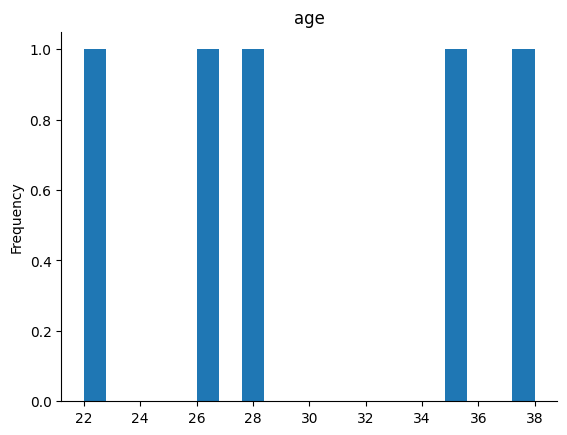

In [ ]:
from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


In [ ]:
# prompt: what to do when file size is much greater can fit into memory

dataset = tf.data.Dataset.from_generator(
    lambda: tf.io.gfile.GFile(filename).readlines(),
    output_types=tf.string)
n

In [ ]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived")

In [ ]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [0 1 1 0]
features:
  'sex'               : [b'male' b'female' b'female' b'male']
  'age'               : [16. 30. 41. 28.]
  'n_siblings_spouses': [0 0 0 0]
  'parch'             : [0 0 1 0]
  'fare'              : [  9.5   106.425  19.5    26.   ]
  'class'             : [b'Third' b'First' b'Second' b'First']
  'deck'              : [b'unknown' b'unknown' b'unknown' b'A']
  'embark_town'       : [b'Southampton' b'Cherbourg' b'Southampton' b'Southampton']
  'alone'             : [b'y' b'y' b'n' b'y']


In [ ]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [ ]:

inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


In [ ]:
batched_dataset
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.int64, name=None), TensorSpec(shape=(7,), dtype=tf.int64, name=None))>

In [ ]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(3):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]

[[ 8  8  8  8  8  8  8  8  0  0  0]
 [ 9  9  9  9  9  9  9  9  9  0  0]
 [10 10 10 10 10 10 10 10 10 10  0]
 [11 11 11 11 11 11 11 11 11 11 11]]



In [ ]:
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [ ]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

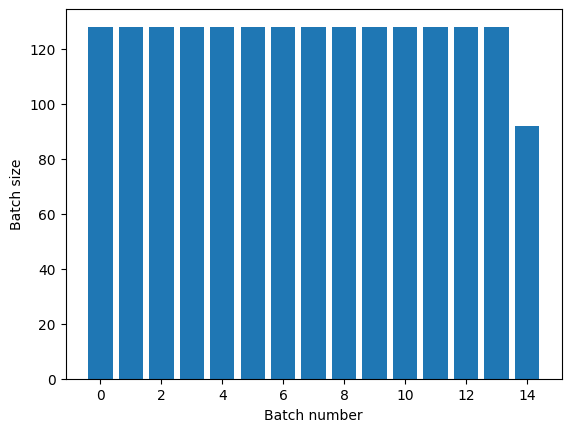

In [ ]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

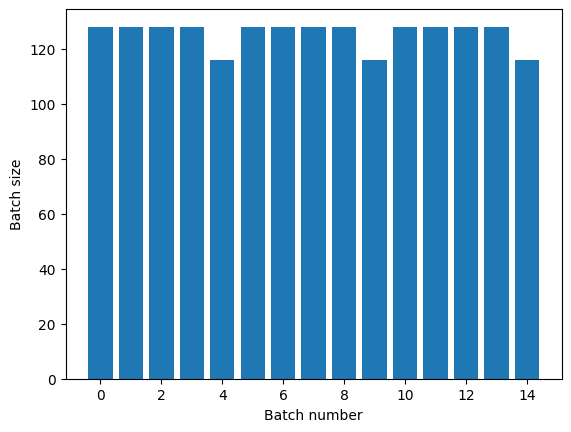

In [ ]:

titanic_batches = titanic_lines.batch(128).repeat(3)

plot_batch_sizes(titanic_batches)

In [ ]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [ ]:
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  print(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

tf.Tensor(
[[[ 32  63  55]
  [113 140 135]
  [157 181 181]
  ...
  [232 237 230]
  [217 224 216]
  [216 226 218]]

 [[ 22  21  26]
  [  2   1   7]
  [  0   0   7]
  ...
  [214 219 212]
  [218 228 220]
  [223 232 227]]

 [[146 172 171]
  [111 132 133]
  [ 66  80  83]
  ...
  [217 223 219]
  [215 224 219]
  [212 221 218]]

 ...

 [[ 36  59   0]
  [ 33  70   0]
  [ 28  69   9]
  ...
  [ 73  63  97]
  [ 35  31  32]
  [118 109  94]]

 [[ 38  59  18]
  [ 37  69   0]
  [ 37  71   0]
  ...
  [158 144 206]
  [103  95 108]
  [ 99  87  61]]

 [[ 31  76   0]
  [ 28  61  14]
  [ 32  61   5]
  ...
  [123 105 181]
  [148 135 165]
  [139 123 100]]], shape=(240, 320, 3), dtype=uint8)


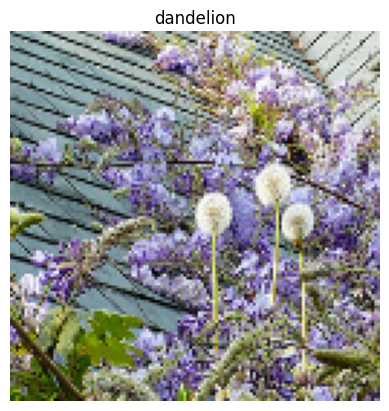

In [ ]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)


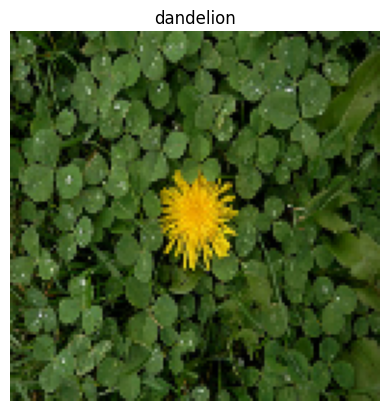

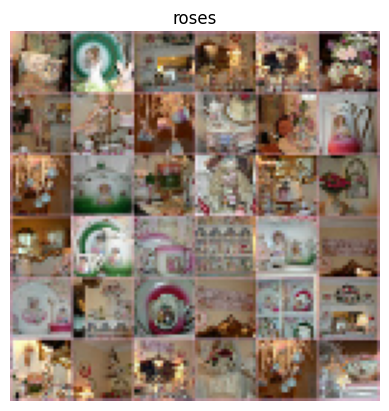

In [ ]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

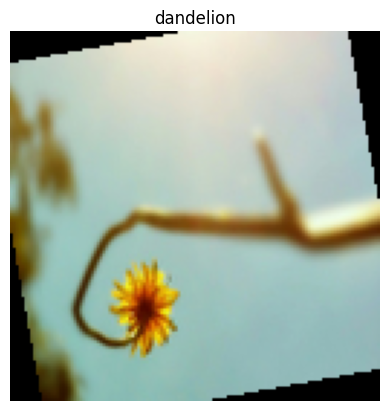

In [ ]:
import scipy.ndimage as ndimage

@tf.py_function(Tout=tf.float32)
def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5959 - accuracy: 0.8001
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4604 - accuracy: 0.8434


In [ ]:
model.fit(fmnist_train_ds.repeat(), epochs=2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.8562
Epoch 2/2
20/20 [==============================] - 0s 5ms/step - loss: 0.4333 - accuracy: 0.8562


In [ ]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4347 - accuracy: 0.8522
Loss : 0.4347476661205292
Accuracy : 0.852150022983551


In [ ]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss :", loss)
print("Accuracy :", accuracy)

10/10 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.8687
Loss : 0.3886893391609192
Accuracy : 0.8687499761581421


In [ ]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 3ms/step
(320, 10)


In [ ]:
@tf.function  # The decorator converts `add` into a `PolymorphicFunction`.
def add(a, b):
  return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))  #  [[2., 2.], [2., 2.]]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
v = tf.Variable(1.0)
with tf.GradientTape() as tape:
  result = add(v, 1.0)
tape.gradient(result, v)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
@tf.function
def dense_layer(x, w, b):
  return add(tf.matmul(x, w), b)

dense_layer(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [ ]:
@tf.function  # The decorator converts `add` into a `PolymorphicFunction`.
def add(a, b):
  return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))  #  [[2., 2.], [2., 2.]]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
v = tf.Variable(1.0)
with tf.GradientTape() as tape:
  result = add(v, 1.0)
tape.gradient(result, v)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# Warm up
conv_layer(image); conv_fn(image)
print("Eager conv:", timeit.timeit(lambda: conv_layer(image), number=10))
print("Function conv:", timeit.timeit(lambda: conv_fn(image), number=10))
print("Note how there's not much difference in performance for convolutions")

Eager conv: 0.018531053000060638
Function conv: 0.020739320000075168
Note how there's not much difference in performance for convolutions


In [ ]:
@tf.function
def double(a):
  print("Tracing with", a)
  return a + a

print(double(tf.constant(1)))
print()
print(double(tf.constant(1.1)))
print()
print(double(tf.constant("a")))
print()

Tracing with Tensor("a:0", shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)

Tracing with Tensor("a:0", shape=(), dtype=float32)
tf.Tensor(2.2, shape=(), dtype=float32)

Tracing with Tensor("a:0", shape=(), dtype=string)
tf.Tensor(b'aa', shape=(), dtype=string)



In [ ]:
print(double(tf.constant("b")))

tf.Tensor(b'bb', shape=(), dtype=string)


In [ ]:
print(double.pretty_printed_concrete_signatures())

Input Parameters:
  a (POSITIONAL_OR_KEYWORD): TensorSpec(shape=(), dtype=tf.int32, name=None)
Output Type:
  TensorSpec(shape=(), dtype=tf.int32, name=None)
Captures:
  None

Input Parameters:
  a (POSITIONAL_OR_KEYWORD): TensorSpec(shape=(), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(), dtype=tf.float32, name=None)
Captures:
  None

Input Parameters:
  a (POSITIONAL_OR_KEYWORD): TensorSpec(shape=(), dtype=tf.string, name=None)
Output Type:
  TensorSpec(shape=(), dtype=tf.string, name=None)
Captures:
  None


In [ ]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),))
def next_collatz(x):
  print("Tracing with", x)
  return tf.where(x % 2 == 0, x // 2, 3 * x + 1)

print(next_collatz(tf.constant([1, 2])))
# You specified a 1-D tensor in the input signature, so this should fail.
with assert_raises(TypeError):
  next_collatz(tf.constant([[1, 2], [3, 4]]))

# You specified an int32 dtype in the input signature, so this should fail.


Tracing with Tensor("x:0", shape=(None,), dtype=int32)
tf.Tensor([4 1], shape=(2,), dtype=int32)
Caught expected exception 
  <class 'TypeError'>:


Traceback (most recent call last):
  File "<ipython-input-2-73d0ca52e838>", line 8, in assert_raises
    yield
  File "<ipython-input-12-c1c0f1673618>", line 9, in <cell line: 8>
    next_collatz(tf.constant([[1, 2], [3, 4]]))
TypeError: Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(2, 2), dtype=tf.int32, name=None) to TensorSpec(shape=(None,), dtype=tf.int32, name=None)`. Received args: (<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>,) and kwargs: {} for signature: (x: TensorSpec(shape=(None,), dtype=tf.int32, name=None)).


In [ ]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),))
def g(x):
  print('Tracing with', x)
  return x

# No retrace!
print(g([1, 2, 3]))
print(g([1, 2, 3, 4, 5]))

Tracing with Tensor("x:0", shape=(None,), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [ ]:
@tf.function(reduce_retracing=True)
def g(x):
  print('Tracing with', x)
  return x

# Traces once.
print(g(tf.constant([1, 2, 3])))

# Traces again, but more generalized this time.
print(g(tf.constant([1, 2, 3, 4, 5])))

# No more tracing!
print(g(tf.constant([1, 2, 3, 4, 5, 6, 7])))
print(g(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9.0])))

Tracing with Tensor("x:0", shape=(3,), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Tracing with Tensor("x:0", shape=(None,), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
Tracing with Tensor("x:0", shape=(9,), dtype=float32)
tf.Tensor([1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(9,), dtype=float32)


In [ ]:
def train_one_step():
  pass

@tf.function
def train(num_steps):
  print("Tracing with num_steps = ", num_steps)
  tf.print("Executing with num_steps = ", num_steps)
  for _ in tf.range(num_steps):
    train_one_step()

print("Retracing occurs for different Python arguments.")
train(num_steps=10)
train(num_steps=20)

print()
print("Traces are reused for Tensor arguments.")
train(num_steps=tf.constant(10))
train(num_steps=tf.constant(20))

Retracing occurs for different Python arguments.
Tracing with num_steps =  10
Executing with num_steps =  10
Tracing with num_steps =  20
Executing with num_steps =  20

Traces are reused for Tensor arguments.
Tracing with num_steps =  Tensor("num_steps:0", shape=(), dtype=int32)
Executing with num_steps =  10
Executing with num_steps =  20


In [ ]:
def f():
  print('Tracing!')
  tf.print('Executing')

tf.function(f)()
tf.function(f)()

Tracing!
Executing
Tracing!
Executing


In [ ]:
print("Obtaining concrete trace")
double_strings = double.get_concrete_function(tf.constant("a"))
print("Executing traced function")
print(double_strings(tf.constant("a")))
print(double_strings(a=tf.constant("b")))

Obtaining concrete trace
Executing traced function
tf.Tensor(b'aa', shape=(), dtype=string)
tf.Tensor(b'bb', shape=(), dtype=string)


In [ ]:
# You can also call get_concrete_function on an InputSpec
double_strings_from_inputspec = double.get_concrete_function(tf.TensorSpec(shape=[], dtype=tf.string))
print(double_strings_from_inputspec(tf.constant("c")))

tf.Tensor(b'cc', shape=(), dtype=string)


In [ ]:
print(double_strings)

ConcreteFunction Input Parameters:
  a (POSITIONAL_OR_KEYWORD): TensorSpec(shape=(), dtype=tf.string, name=None)
Output Type:
  TensorSpec(shape=(), dtype=tf.string, name=None)
Captures:
  None


In [ ]:
with assert_raises(tf.errors.InvalidArgumentError):
  double_strings(tf.constant(1))

Caught expected exception 
  <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>:


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/function_type_utils.py", line 442, in bind_function_inputs
    bound_arguments = function_type.bind_with_defaults(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 277, in bind_with_defaults
    with_default_args[arg_name] = constraint.cast(
TypeError: Can not cast TensorSpec(shape=(), dtype=tf.int32, name=None) to TensorSpec(shape=(), dtype=tf.string, name=None)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py", line 1180, in _call_impl
    return self._call_with_structured_signature(args, kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py", line 1260, in _call_

In [ ]:
graph = double_strings.graph
for node in graph.as_graph_def().node:
  print(f'{node.input} -> {node.name}')

[] -> a
['a', 'a'] -> add
['add'] -> Identity


In [ ]:
atomic_fn = double_strings.inference_fn
print(atomic_fn)

<AtomicFunction> __inference_double_20(a: TensorSpec(shape=(), dtype=tf.string, name=None)) -> TensorSpec(shape=(), dtype=tf.string, name=None)


In [ ]:
@tf.function
def f(x):
  while tf.reduce_sum(x) > 1:
    tf.print(x)
    x = tf.tanh(x)
  return x

f(tf.random.uniform([5]))

[0.31101048 0.975926161 0.201080203 0.407943726 0.4850142]
[0.301356047 0.751297057 0.198413193 0.386725307 0.450250328]
[0.292553067 0.635922194 0.195849851 0.368533671 0.422104746]
[0.284482956 0.562116623 0.193383574 0.352708459 0.398702085]
[0.277049035 0.509546161 0.191008404 0.338775337 0.378837854]
[0.270171702 0.469591528 0.188718855 0.32638365 0.361697733]
[0.263784558 0.437869191 0.186509907 0.315267563 0.346708566]
[0.257831961 0.411876649 0.18437694 0.305221558 0.333453298]
[0.252266556 0.390064955 0.182315648 0.296083748 0.321620286]
[0.24704808 0.371416211 0.180322126 0.287724614 0.31097123]
[0.242141798 0.355229825 0.178392738 0.280039191 0.301320374]
[0.237517715 0.341005415 0.176524118 0.272941351 0.292520493]
[0.233149767 0.328374684 0.174713135 0.266359627 0.284453]
[0.229015037 0.317059547 0.172956869 0.260234207 0.277021408]
[0.225093484 0.306845695 0.171252623 0.254514545 0.270146072]
[0.221367344 0.297564805 0.169597864 0.249157682 0.263760716]
[0.217820883 0.289

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.1898, 0.2314, 0.1541, 0.2064, 0.2144], dtype=float32)>

In [ ]:
print(tf.autograph.to_code(f.python_function))

def tf__f(x):
    with ag__.FunctionScope('f', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body():
            nonlocal x
            ag__.converted_call(ag__.ld(tf).print, (ag__.ld(x),), None, fscope)
            x = ag__.converted_call(ag__.ld(tf).tanh, (ag__.ld(x),), None, fscope)

        def loop_test():
            return ag__.converted_call(ag__.ld(tf).reduce_sum, (ag__.ld(x),), None, fscope) > 1
        ag__.while_stmt(loop_test, loop_body, get_state, set_state, ('x',), {})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
@tf.function
def fizzbuzz(n):
  for i in tf.range(1, n + 1):
    print('Tracing for loop')
    if i % 15 == 0:
      print('Tracing fizzbuzz branch')
      tf.print('fizzbuzz')
    elif i % 3 == 0:
      print('Tracing fizz branch')
      tf.print('fizz')
    elif i % 5 == 0:
      print('Tracing buzz branch')
      tf.print('buzz')
    else:
      print('Tracing default branch')
      tf.print(i)


fizzbuzz(20)

Tracing for loop
Tracing fizzbuzz branch
Tracing fizz branch
Tracing buzz branch
Tracing default branch
1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz


In [ ]:
def measure_graph_size(f, *args):
  g = f.get_concrete_function(*args).graph
  print("{}({}) contains {} nodes in its graph".format(
      f.__name__, ', '.join(map(str, args)), len(g.as_graph_def().node)))

@tf.function
def train(dataset):
  loss = tf.constant(0)
  for x, y in dataset:
    loss += tf.abs(y - x) # Some dummy computation.
  return loss

small_data = [(1, 1)] * 3
big_data = [(1, 1)] * 10
measure_graph_size(train, small_data)
measure_graph_size(train, big_data)

measure_graph_size(train, tf.data.Dataset.from_generator(
    lambda: small_data, (tf.int32, tf.int32)))
measure_graph_size(train, tf.data.Dataset.from_generator(
    lambda: big_data, (tf.int32, tf.int32)))

train([(1, 1), (1, 1), (1, 1)]) contains 11 nodes in its graph
train([(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]) contains 32 nodes in its graph
train(<_FlatMapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>) contains 6 nodes in its graph
train(<_FlatMapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>) contains 6 nodes in its graph


In [ ]:
x = None

@tf.function
def leaky_function(a):
  global x
  x = a + 1  # Bad - leaks local tensor
  return a + 2

correct_a = leaky_function(tf.constant(1))

print(correct_a.numpy())  # Good - value obtained from function's returns
try:
  x.numpy()  # Bad - tensor leaked from inside the function, cannot be used here
except AttributeError as expected:
  print(expected)

3
'SymbolicTensor' object has no attribute 'numpy'


In [ ]:
@tf.function
def leaky_function(a):
  global x
  x = a + 1  # Bad - leaks local tensor
  return x  # Good - uses local tensor

correct_a = leaky_function(tf.constant(1))

print(correct_a.numpy())  # Good - value obtained from function's returns
try:
  x.numpy()  # Bad - tensor leaked from inside the function, cannot be used here
except AttributeError as expected:
  print(expected)

@tf.function
def captures_leaked_tensor(b):
  b += x  # Bad - `x` is leaked from `leaky_function`
  return b

with assert_raises(TypeError):
  captures_leaked_tensor(tf.constant(2))


2
'SymbolicTensor' object has no attribute 'numpy'
Caught expected exception 
  <class 'TypeError'>:


Traceback (most recent call last):
  File "<ipython-input-14-73d0ca52e838>", line 8, in assert_raises
    yield
  File "<ipython-input-15-38c5ece6782b>", line 21, in <cell line: 20>
    captures_leaked_tensor(tf.constant(2))
TypeError: <tf.Tensor 'add:0' shape=() dtype=int32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'add:0' shape=() dtype=int32> was defined here:
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernela

In [ ]:
@tf.function
def f(x):
  v = tf.Variable(1.0)
  return v

with assert_raises(ValueError):
  f(1.0)

Caught expected exception 
  <class 'ValueError'>:


Traceback (most recent call last):
  File "<ipython-input-2-73d0ca52e838>", line 8, in assert_raises
    yield
  File "<ipython-input-3-8a0913e250e0>", line 7, in <cell line: 6>
    f(1.0)
ValueError: in user code:

    File "<ipython-input-3-8a0913e250e0>", line 3, in f  *
        v = tf.Variable(1.0)

    ValueError: tf.function only supports singleton tf.Variables created on the first call. Make sure the tf.Variable is only created once or created outside tf.function. See https://www.tensorflow.org/guide/function#creating_tfvariables for more information.



In [ ]:
class Net(tf.keras.Model):
  """A simple linear model."""

  def __init__(self):
    super(Net, self).__init__()
    self.l1 = tf.keras.layers.Dense(5)

  def call(self, x):
    return self.l1(x)

net = Net()

In [ ]:
net.save_weights('easy_checkpoint')

In [ ]:
def toy_dataset():
  inputs = tf.range(10.)[:, None]
  labels = inputs * 5. + tf.range(5.)[None, :]
  return tf.data.Dataset.from_tensor_slices(
    dict(x=inputs, y=labels)).repeat().batch(2)

In [ ]:
def train_step(net, example, optimizer):
  """Trains `net` on `example` using `optimizer`."""
  with tf.GradientTape() as tape:
    output = net(example['x'])
    loss = tf.reduce_mean(tf.abs(output - example['y']))
  variables = net.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))
  return loss

In [ ]:
opt = tf.keras.optimizers.Adam(0.1)
dataset = toy_dataset()
iterator = iter(dataset)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=net, iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, './tf_ckpts', max_to_keep=3)

In [ ]:
def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")

  for _ in range(50):
    example = next(iterator)
    loss = train_step(net, example, opt)
    ckpt.step.assign_add(1)
    if int(ckpt.step) % 10 == 0:
      save_path = manager.save()
      print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
      print("loss {:1.2f}".format(loss.numpy()))

train_and_checkpoint(net, manager)

Initializing from scratch.
Saved checkpoint for step 10: ./tf_ckpts/ckpt-1
loss 24.03
Saved checkpoint for step 20: ./tf_ckpts/ckpt-2
loss 17.44
Saved checkpoint for step 30: ./tf_ckpts/ckpt-3
loss 10.90
Saved checkpoint for step 40: ./tf_ckpts/ckpt-4
loss 4.53
Saved checkpoint for step 50: ./tf_ckpts/ckpt-5
loss 1.08


### Save Model

In [ ]:
import os
import tempfile

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

tmpdir = tempfile.mkdtemp()

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
  tf.config.experimental.set_memory_growth(device, True)

61306/61306 [==============================] - 0s 1us/step


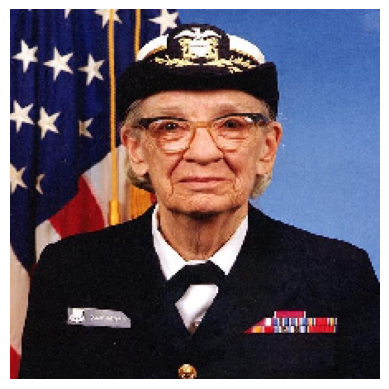

In [ ]:
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
img = tf.keras.utils.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.utils.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [ ]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


In [ ]:
pretrained_model = tf.keras.applications.MobileNet()
result_before_save = pretrained_model(x)

decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]

print("Result before saving:\n", decoded)

17225924/17225924 [==============================] - 1s 0us/step
Result before saving:
 ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']


In [ ]:
mobilenet_save_path = os.path.join(tmpdir, "mobilenet/1/")
tf.saved_model.save(pretrained_model, mobilenet_save_path)

In [ ]:
loaded = tf.saved_model.load(mobilenet_save_path)
print(list(loaded.signatures.keys()))  # ["serving_default"]

['serving_default']


In [ ]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'predictions': TensorSpec(shape=(None, 1000), dtype=tf.float32, name='predictions')}


In [ ]:
labeling = infer(tf.constant(x))[pretrained_model.output_names[0]]
print("Result after saving and loading:\n", pretrained_model.output_names[0])
decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

print("Result after saving and loading:\n", decoded)

Result after saving and loading:
 predictions
Result after saving and loading:
 ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']


In [ ]:
class CustomModule(tf.Module):

  def __init__(self):
    super(CustomModule, self).__init__()
    self.v = tf.Variable(1.)

  @tf.function
  def __call__(self, x):
    print('Tracing with', x)
    return x * self.v

  @tf.function(input_signature=[tf.TensorSpec([], tf.float32)])
  def mutate(self, new_v):
    self.v.assign(new_v)

module = CustomModule()

In [ ]:
module_no_signatures_path = os.path.join(tmpdir, 'module_no_signatures')
module(tf.constant(0.))
print('Saving model...')
tf.saved_model.save(module, module_no_signatures_path)

Tracing with Tensor("x:0", shape=(), dtype=float32)
Saving model...
Tracing with Tensor("x:0", shape=(), dtype=float32)


In [ ]:
imported = tf.saved_model.load(module_no_signatures_path)
assert imported(tf.constant(3.)).numpy() == 3
imported.mutate(tf.constant(2.))
assert imported(tf.constant(3.)).numpy() == 6

In [ ]:
imported(tf.constant([3.]))

ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (1 total):
    * <tf.Tensor 'x:0' shape=(1,) dtype=float32>
  Keyword arguments: {}

 Expected these arguments to match one of the following 1 option(s):

Option 1:
  Positional arguments (1 total):
    * TensorSpec(shape=(), dtype=tf.float32, name='x')
  Keyword arguments: {}

In [ ]:

optimizer = tf.keras.optimizers.SGD(0.05)

def train_step():
  with tf.GradientTape() as tape:
    loss = (10. - imported(tf.constant(2.))) ** 2
  variables = tape.watched_variables()
  grads = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(grads, variables))
  return loss

for _ in range(10):
  # "v" approaches 5, "loss" approaches 0
  print("loss={:.2f} v={:.2f}".format(train_step(), imported.v.numpy()))

loss=36.00 v=3.20
loss=12.96 v=3.92
loss=4.67 v=4.35
loss=1.68 v=4.61
loss=0.60 v=4.77
loss=0.22 v=4.86
loss=0.08 v=4.92
loss=0.03 v=4.95
loss=0.01 v=4.97
loss=0.00 v=4.98



###Sequential API

In [ ]:
import tensorflow as tf
from keras import layers
import keras

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print(y)
print("Number of weights after calling the model:", len(model.weights))  #

tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
Number of weights after calling the model: 6


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 32)        0         
 D)                                                              
                                                                 
Total params: 11680 (45.62 KB)
Trainable params: 11680 (45.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      2432   

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)
print(len(features))

3


In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)
print(len(features))

1


In [ ]:
inputs = keras.Input(shape=(784,))


# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

In [ ]:
img_inputs.shape

TensorShape([None, 32, 32, 3])

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


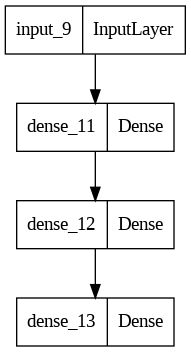

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

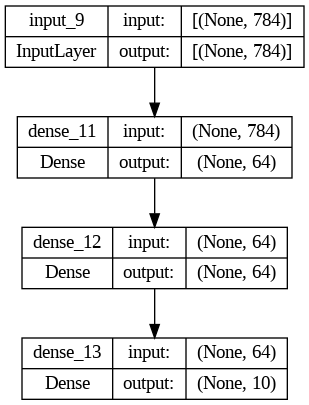

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train.shape
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 5s 4ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.2080 - val_sparse_categorical_accuracy: 0.9413
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.1439 - val_sparse_categorical_accuracy: 0.9588
313/313 - 1s - loss: 0.1366 - sparse_categorical_accuracy: 0.9565 - 542ms/epoch - 2ms/step
Test loss: 0.1366291493177414
Test accuracy: 0.9564999938011169


In [ ]:
model.save("path_to_my_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model.keras")

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [ ]:

encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [ ]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128)]                0         []                            
                                                                                                  
 model_4 (Functional)        (None, 1)                    129       ['input_10[0][0]']            
                                                                                                  
 model_5 (Functional)        (None, 1)                    129       ['input_10[0][0]']            
                                                                                                  
 model_6 (Functional)        (None, 1)                    129       ['input_10[0][0]']            
                                                                                            

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

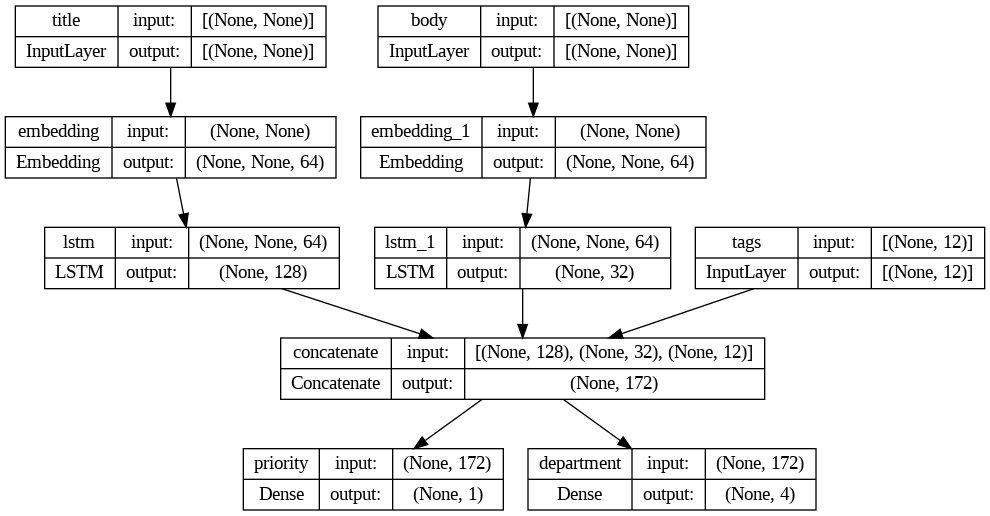

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

In [ ]:
# Dummy input data
import numpy as np
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 12s 118ms/step - loss: 1.2802 - priority_loss: 0.7003 - department_loss: 2.8996
Epoch 2/2
40/40 [==============================] - 3s 64ms/step - loss: 1.2902 - priority_loss: 0.6983 - department_loss: 2.9597


In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_9 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_8[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_9[0][0]']            
 g2D)                                                                                    

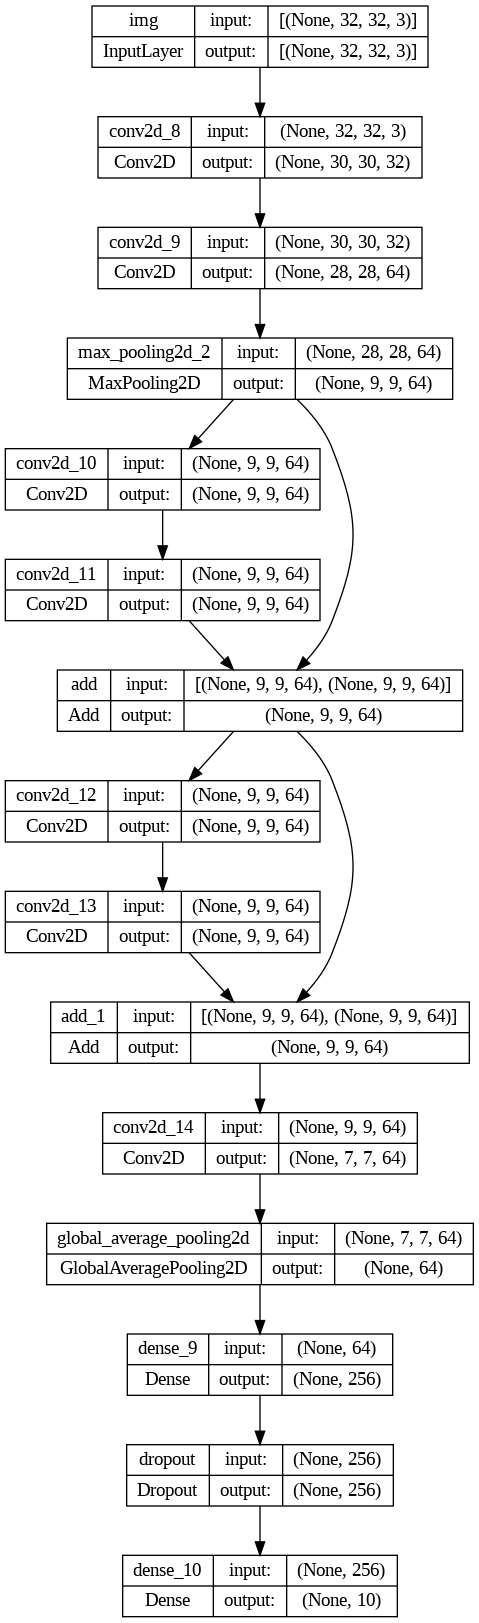

In [ ]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 5s 77ms/step - loss: 2.3006 - acc: 0.1000 - val_loss: 2.2882 - val_acc: 0.1050


In [ ]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [ ]:
vgg19 = keras.applications.VGG19()

574710816/574710816 [==============================] - 7s 0us/step


In [ ]:
features_list = [layer.output for layer in vgg19.layers]

In [ ]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

features_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_13')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>

In [ ]:
import tensorflow as tf
from keras import layers
import keras

In [ ]:

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train.shape

(50000,)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 7s 5ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.9027 - val_loss: 0.1867 - val_sparse_categorical_accuracy: 0.9427
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1614 - sparse_categorical_accuracy: 0.9514 - val_loss: 0.1279 - val_sparse_categorical_accuracy: 0.9632


In [ ]:
history.history


{'loss': [0.34023812413215637, 0.16142137348651886],
 'sparse_categorical_accuracy': [0.902679979801178, 0.9514200091362],
 'val_loss': [0.18669036030769348, 0.12793973088264465],
 'val_sparse_categorical_accuracy': [0.9427000284194946, 0.9631999731063843]}

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
predictions

Evaluate on test data
79/79 [==============================] - 0s 6ms/step - loss: 0.1298 - sparse_categorical_accuracy: 0.9591
test loss, test acc: [0.12978392839431763, 0.9591000080108643]
Generate predictions for 3 samples
1/1 [==============================] - 0s 67ms/step
predictions shape: (3, 10)


array([[2.4405366e-05, 1.4341504e-06, 2.1241840e-03, 1.1259970e-03,
        4.0048846e-08, 4.3272354e-05, 3.3526551e-10, 9.9644238e-01,
        2.2315353e-05, 2.1602612e-04],
       [2.8132345e-07, 2.1594898e-04, 9.9918252e-01, 5.8376137e-04,
        1.6137545e-12, 1.0021015e-06, 4.5228427e-07, 2.7745868e-09,
        1.6115824e-05, 4.1819086e-11],
       [3.0121069e-05, 9.8592204e-01, 2.1708990e-03, 4.6229441e-04,
        1.5814041e-04, 2.2330070e-03, 1.1815029e-03, 5.1728622e-03,
        2.4874127e-03, 1.8185141e-04]], dtype=float32)

In [ ]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

In [ ]:
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred), axis=-1)


model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=custom_mean_squared_error)

# We need to one-hot encode the labels to use MSE
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 4s 3ms/step - loss: 0.0157


In [ ]:
@keras.saving.register_keras_serializable()
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred), axis=-1)
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred), axis=-1)
        return mse + reg * self.regularization_factor

    def get_config(self):
        return {
            "regularization_factor": self.regularization_factor,
            "name": self.name,
        }


model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=CustomMSE())

y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 7s 7ms/step - loss: 0.0390


In [ ]:

@keras.saving.register_keras_serializable()
class CategoricalTruePositives(keras.metrics.Metric):
    def __init__(self, name="categorical_true_positives", **kwargs):
        super().__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="ctp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")
        values = tf.cast(values, "float32")
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_state(self):
        # The state of the metric will be reset at the start of each epoch.
        self.true_positives.assign(0.0)


model = get_uncompiled_model()
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[CategoricalTruePositives()],
)
model.fit(x_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
782/782 [==============================] - 5s 6ms/step - loss: 0.3417 - categorical_true_positives: 45109.0000
Epoch 2/3
782/782 [==============================] - 3s 4ms/step - loss: 0.1569 - categorical_true_positives: 47667.0000
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.1129 - categorical_true_positives: 48375.0000


In [ ]:
model = get_compiled_model()
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)

625/625 [==============================] - 5s 6ms/step - loss: 0.3820 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2456 - val_sparse_categorical_accuracy: 0.9273


In [ ]:

model = get_compiled_model()

# First, let's create a training Dataset instance.
# For the sake of our example, we'll use the same MNIST data as before.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

# Since the dataset already takes care of batching,
# we don't pass a `batch_size` argument.
model.fit(train_dataset, epochs=3)

# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_dataset)


Epoch 1/3
782/782 [==============================] - 5s 5ms/step - loss: 0.3282 - sparse_categorical_accuracy: 0.9075
Epoch 2/3
782/782 [==============================] - 3s 4ms/step - loss: 0.1533 - sparse_categorical_accuracy: 0.9549
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9662
Evaluate
157/157 [==============================] - 0s 2ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9648


{'loss': 0.123307004570961, 'sparse_categorical_accuracy': 0.9648000001907349}

In [ ]:
rrr = dict(zip(model.metrics_names, result))
print(rrr)

{'loss': 0.123307004570961, 'sparse_categorical_accuracy': 0.9648000001907349}


In [ ]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 2s 5ms/step - loss: 0.7732 - sparse_categorical_accuracy: 0.7922
Epoch 2/3
100/100 [==============================] - 1s 5ms/step - loss: 0.3784 - sparse_categorical_accuracy: 0.8905
Epoch 3/3
100/100 [==============================] - 0s 5ms/step - loss: 0.3243 - sparse_categorical_accuracy: 0.9034


In [ ]:

model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(
    train_dataset,
    epochs=1,
    # Only run validation using the first 10 batches of the dataset
    # using the `validation_steps` argument
    validation_data=val_dataset,
    validation_steps=10,
)

782/782 [==============================] - 5s 4ms/step - loss: 0.3434 - sparse_categorical_accuracy: 0.9038 - val_loss: 0.3216 - val_sparse_categorical_accuracy: 0.9250


In [ ]:
import numpy as np
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0

print("Fit with sample weight")
model = get_compiled_model()
model.fit(x_train, y_train, sample_weight=sample_weight, batch_size=64, epochs=1)

Fit with sample weight
782/782 [==============================] - 5s 5ms/step - loss: 0.3794 - sparse_categorical_accuracy: 0.8997


In [ ]:
image_input = keras.Input(shape=(32, 32, 3), name="img_input")
timeseries_input = keras.Input(shape=(None, 10), name="ts_input")

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name="score_output")(x)
class_output = layers.Dense(5, name="class_output")(x)

model = keras.Model(
    inputs=[image_input, timeseries_input], outputs=[score_output, class_output]
)


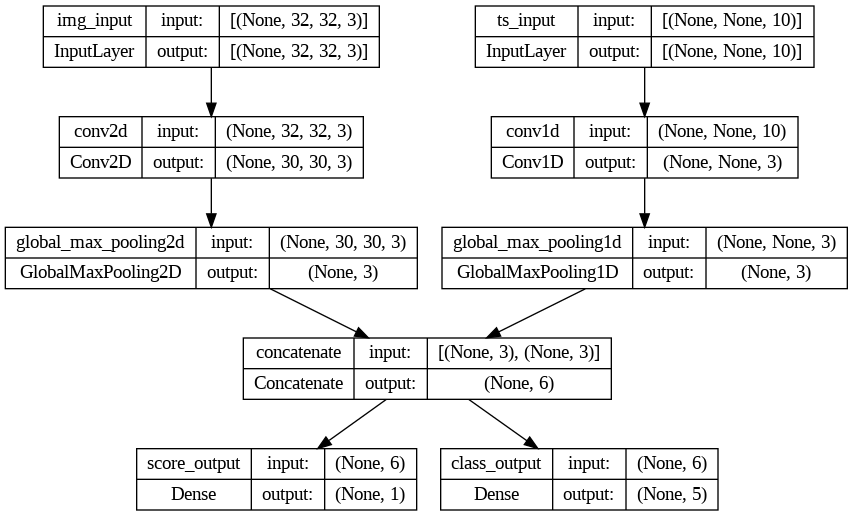

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[
        [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        [keras.metrics.CategoricalAccuracy()],
    ],
)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
)

# Generate dummy NumPy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

# Fit on lists
model.fit([img_data, ts_data], [score_targets, class_targets], batch_size=32, epochs=1)

# Alternatively, fit on dicts
model.fit(
    {"img_input": img_data, "ts_input": ts_data},
    {"score_output": score_targets, "class_output": class_targets},
    batch_size=32,
    epochs=1,
)

4/4 [==============================] - 1s 7ms/step - loss: 17.2152 - score_output_loss: 0.1016 - class_output_loss: 17.1135


In [ ]:
model = get_compiled_model()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="mymodel_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
model.fit(
    x_train, y_train, epochs=2, batch_size=64, callbacks=callbacks, validation_split=0.2
)

Epoch 1/2
624/625 [============================>.] - ETA: 0s - loss: 0.3876 - sparse_categorical_accuracy: 0.8902
Epoch 1: val_loss improved from inf to 0.23509, saving model to mymodel_1
625/625 [==============================] - 9s 11ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.2351 - val_sparse_categorical_accuracy: 0.9308
Epoch 2/2
618/625 [============================>.] - ETA: 0s - loss: 0.1834 - sparse_categorical_accuracy: 0.9453
Epoch 2: val_loss improved from 0.23509 to 0.18291, saving model to mymodel_2
625/625 [==============================] - 4s 7ms/step - loss: 0.1829 - sparse_categorical_accuracy: 0.9455 - val_loss: 0.1829 - val_sparse_categorical_accuracy: 0.9454


In [ ]:

import os

# Prepare a directory to store all the checkpoints.
checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()


model = make_or_restore_model()
callbacks = [
    # This callback saves the model every 100 batches.
    # We include the training loss in the saved model name.
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + "/model-loss={loss:.2f}", save_freq=100
    )
]
model.fit(x_train, y_train, epochs=1, callbacks=callbacks)

Creating a new model
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3021 - sparse_categorical_accuracy: 0.9116
